## SMOTE

Tecnica de OVERSAMPLING

In [1]:
import pandas as pd


In [5]:
dataset = pd.read_csv("c:\datos\DS_Credito Hipotecario_Sin_Nulls_Solo_Numeros.csv")

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 434 entries, 0 to 433
Data columns (total 5 columns):
INGRESOS_SOLICITANTE      434 non-null int64
INGRESOS_COSOLICITANTE    434 non-null float64
MONTO_PRESTAMO_MILES      434 non-null int64
PLAZO_PRESTAMO_MESES      434 non-null int64
FLAG_CRED_HIPO            434 non-null object
dtypes: float64(1), int64(3), object(1)
memory usage: 17.0+ KB


In [7]:
dataset.groupby("FLAG_CRED_HIPO").agg("size")

FLAG_CRED_HIPO
N    131
Y    303
dtype: int64

In [8]:
import seaborn as sns

## da visualizacion a las librerias de ploteo en jupyter
%matplotlib inline

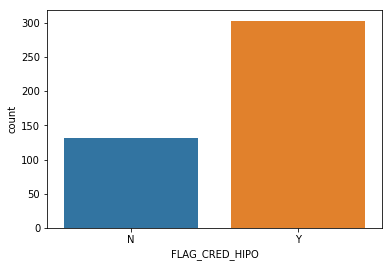

In [9]:
sns.countplot(x="FLAG_CRED_HIPO" ,  data = dataset)

In [10]:
## La clase minoritaria es "N"

t = dataset[["FLAG_CRED_HIPO"]]
n_samples = t.shape[0]
n_samples_Y = (t=="Y").sum()
n_samples_N = (t=="N").sum()


In [11]:
n_samples_N_new = 0.50*n_samples_Y/(0.5) - n_samples_N
n_samples_N_new

FLAG_CRED_HIPO    172.0
dtype: float64

In [12]:
# seleccionando los puntos base para nueva data de SMOTE
sel_ = dataset.loc[dataset["FLAG_CRED_HIPO"] == "N"].iloc[: , :-1].sample(n = int(n_samples_N_new) , replace = True , random_state = 10)

In [13]:
import numpy as np
import random
# randoms para generacion de nueva data (p1-o---------o-rnd-----o-p2)
steps = np.random.uniform(size = int(n_samples_N_new[0]))

# funcion para seleccionar un row aleatorio de un dataframe
def random_row_df(df):
    index_random = random.choice(range(len(df)))
    i = 0
    for index,row in df.iterrows():
        if i==index_random:
            d = {}
            indexs = row.index.tolist()
            values = row.values.tolist()
            for j in range(len(indexs)):
                d[indexs[j]] = [values[j]]
            df_row = pd.DataFrame(d)
            break
        i = i + 1
    return df_row
    
# generacion de nueva data (rows) con SMOTE

i=0
df_news = None
for index , row in sel_.iterrows():
    d = {}
    indexs = row.index.tolist()
    values = row.values.tolist()
    for j in range(len(indexs)):
        d[indexs[j]] = [values [j]]
    df_initial = pd.DataFrame(d)
    
    step = steps[i]
    
    #SMOTE
    # df_new ES EL PUNTO SINTETICO Y TOMADO COMO MUESTRA DE 
    # LA CLASE MINORITARIA (N)
    df_new = df_initial - step * (df_initial - random_row_df(sel_))
    
    #se concatena todos nuevos rows generados del SMOTE
    df_news = pd.concat([df_news , df_new])
    i = i +1 

df_news["FLAG_CRED_HIPO"] = "N"
dataset_smoted = pd.concat([dataset , df_news])

# reseto de indices
dataset_smoted.reset_index(drop = True , inplace = True)

# transformacion de columns a entero
dataset_smoted["PLAZO_PRESTAMO_MESES"] = dataset_smoted["PLAZO_PRESTAMO_MESES"].astype(int)

dataset_smoted.head()    

,FLAG_CRED_HIPO,INGRESOS_COSOLICITANTE,INGRESOS_SOLICITANTE,MONTO_PRESTAMO_MILES,PLAZO_PRESTAMO_MESES
0,N,1508.0,4583.0,128.0,360
1,Y,0.0,3000.0,66.0,360
2,Y,2358.0,2583.0,120.0,360
3,Y,0.0,6000.0,141.0,360
4,Y,4196.0,5417.0,267.0,360


In [14]:
dataset_smoted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606 entries, 0 to 605
Data columns (total 5 columns):
FLAG_CRED_HIPO            606 non-null object
INGRESOS_COSOLICITANTE    606 non-null float64
INGRESOS_SOLICITANTE      606 non-null float64
MONTO_PRESTAMO_MILES      606 non-null float64
PLAZO_PRESTAMO_MESES      606 non-null int32
dtypes: float64(3), int32(1), object(1)
memory usage: 21.4+ KB


In [15]:
dataset_smoted.groupby("FLAG_CRED_HIPO").agg("size")

FLAG_CRED_HIPO
N    303
Y    303
dtype: int64

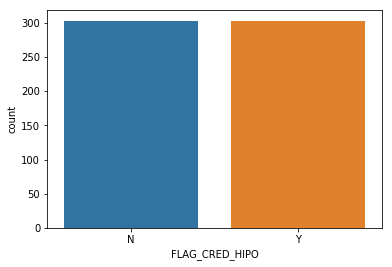

In [16]:
sns.countplot(x="FLAG_CRED_HIPO" ,  data = dataset_smoted)